In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from astropy.io import fits
import pandas as pd
import os
import aplpy
plt.style.use("dark_background")

In [ ]:
def make_model_plots(model_dir, plot_dir):
    filelist = [f for f in os.listdir(model_dir) if '.fits' in f]
    if not os.path.exists(plot_dir):
        os.mkdir(plot_dir)
    for i, file in enumerate(filelist):
        filename = os.path.join(model_dir, file)
        data = fits.open(filename)[0].data
        image = np.sum(data, axis=0)
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
        im =ax.imshow(image, cmap='magma', origin='lower')
        ax.set_xlabel('y')
        ax.set_ylabel('x')
        ax.grid(alpha=0.1)
        ax.set_title('Model Image')
        ax.set_facecolor('black')
        ax.spines['top'].set_edgecolor('orange')
        ax.spines['left'].set_edgecolor('orange')
        ax.spines['bottom'].set_edgecolor('orange')
        ax.spines['right'].set_edgecolor('orange')
        plt.tight_layout()
        output_name = os.path.join(plot_dir, "model_image_" + str(i) + ".png")
        plt.savefig(output_name)
        #plt.show()

def make_dirty_plots(model_dir, plot_dir):
    filelist = [f for f in os.listdir(model_dir) if 'dirty.fits' in f]
    if not os.path.exists(plot_dir):
        os.mkdir(plot_dir)
    for i, file in enumerate(filelist):
        filename = os.path.join(model_dir, file)
        data = fits.open(filename)[0].data[0]
        image = np.sum(data, axis=0)
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
        im =ax.imshow(image, cmap='magma', origin='lower')
        ax.set_xlabel('y')
        ax.set_ylabel('x')
        ax.grid(alpha=0.1)
        ax.set_title('Dirty Image')
        ax.set_facecolor('black')
        ax.spines['top'].set_edgecolor('orange')
        ax.spines['left'].set_edgecolor('orange')
        ax.spines['bottom'].set_edgecolor('orange')
        ax.spines['right'].set_edgecolor('orange')
        plt.tight_layout()
        output_name = os.path.join(plot_dir, "dirty_image_" + str(i) + ".png")
        plt.savefig(output_name)
        #plt.show()

def make_cube_gif(sim_dir, gif_dir, i):
    name = 'gauss_cube_sim_' + str(i) + '.dirty.fits'
    if not os.path.exists(gif_dir):
        os.mkdir(gif_dir)
    filename = os.path.join(sim_dir, name)
    nchan = 128
    hdulist = fits.open(filename)
    cube = hdulist[0].data[0]
    os.system('rm -rf' + gif_dir + '/*.png')
    for j in range(0, nchan):
        image = cube[j]
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
        im =ax.imshow(image, cmap='magma', origin='lower')
        ax.set_title('Slice ' + str(j))
        ax.set_xlabel('y')
        ax.set_ylabel('x')
        ax.grid(alpha=0.1)
        ax.set_facecolor('black')
        ax.spines['top'].set_edgecolor('orange')
        ax.spines['left'].set_edgecolor('orange')
        ax.spines['bottom'].set_edgecolor('orange')
        ax.spines['right'].set_edgecolor('orange')
        plt.tight_layout()
        plt.savefig(gif_dir + '/' + str(j) +'.png', pad_inches=0)
    os.system(f'convert -delay 10 -loop 100   {gif_dir}/*.png   {gif_dir}/dirty_cube.gif')
        

In [ ]:
model_dir = 'models'
plot_dir = "/home/michele/Documents/Presentations/AIForum/assets"
make_model_plots(model_dir, plot_dir)




In [ ]:
model_dir = 'sims'
plot_dir = "/home/michele/Documents/Presentations/AIForum/assets"
make_dirty_plots(model_dir, plot_dir)

In [ ]:
from casatasks import exportfits
exportfits(imagename='gauss_cube_sim_0/gauss_cube_sim_0.alma.cycle5.3.quick.psf', fitsimage='gauss_cube_sim_0/gauss_cube_sim_psf.fits')

In [ ]:

filename = 'gauss_cube_sim_0/gauss_cube_sim_psf.fits'
image = fits.open(filename)[0].data[0][0]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
im =ax.imshow(image, cmap='magma', origin='lower')
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.grid(alpha=0.1)
ax.set_title('PSF')
ax.set_facecolor('black')
ax.spines['top'].set_edgecolor('orange')
ax.spines['left'].set_edgecolor('orange')
ax.spines['bottom'].set_edgecolor('orange')
ax.spines['right'].set_edgecolor('orange')
plt.tight_layout()
output_name = os.path.join(plot_dir, "psf.png")
plt.savefig(output_name)

In [ ]:
#exportfits(imagename='gauss_cube_sim_0/gauss_cube_sim_0.alma.cycle5.3.noisy.pb', fitsimage='gauss_cube_sim_0/gauss_cube_sim_pb.fits')
print(plot_dir)
filename = 'gauss_cube_sim_0/gauss_cube_sim_pb.fits'
image = fits.open(filename)[0].data[0][0]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
im =ax.imshow(image, cmap='magma', origin='lower')
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.grid(alpha=0.1)
ax.set_title('Primary Beam')
ax.set_facecolor('black')
ax.spines['top'].set_edgecolor('orange')
ax.spines['left'].set_edgecolor('orange')
ax.spines['bottom'].set_edgecolor('orange')
ax.spines['right'].set_edgecolor('orange')
plt.tight_layout()
output_name = os.path.join(plot_dir, "primary_beam.png")
plt.savefig(output_name)

In [ ]:
sim_dir = 'sims'
gif_dir = 'gifs'
make_cube_gif(sim_dir, gif_dir, 5)

In [ ]:
i = 0
sim_dir = 'sims'
name = 'gauss_cube_sim_' + str(i) + '.dirty.fits'
filename = os.path.join(sim_dir, name)
nchan = 128
hdulist = fits.open(filename)
cube = hdulist[0].data[0]
cube.shape

In [98]:
import glob
from PIL import Image
from natsort import natsorted

def make_gif(frame_folder, output_name, duration):
    frames = [Image.open(image) for image in natsorted(glob.glob(f"{frame_folder}/*.png"))]
    frame_one = frames[0]
    frame_one.save(os.path.join(frame_folder, output_name), format="GIF", append_images=frames,
               save_all=True, duration=duration, loop=1)

In [22]:
make_gif("gifs", "dirty_cube.gif")

NameError: name 'make_gif' is not defined

In [2]:
import comet_ml
comet_ml.init()

Please enter your Comet API key from https://www.comet-ml.com/api/my/settings/
(api key may not show as you type)


COMET INFO: Comet API key is valid
COMET INFO: Comet API key saved in /home/michele/.comet.config


In [3]:
from comet_ml.api import API, APIExperiment
api = API()
experiment = api.get("micheledelliveneri", "alma", "30f61f3ff2b14f40a2fe1cea3dd83c9f")

In [19]:
asset_list = experiment.get_asset_list()
len(asset_list)

122

In [17]:
asset = asset_list[100]
timages_dir = 'training_images/'
link = asset['compressedAssetLink']
name = asset['fileName'].split(".")[0]
filename = os.path.join(timages_dir, name + '.png')
command = "wget -O {} ".format(filename)  + link
print(command)
os.system(command)

wget -O training_images/Prediction_4499.png https://s3.amazonaws.com/comet.ml/experiment-thumbnail-image_30f61f3ff2b14f40a2fe1cea3dd83c9f-GWNwCIAPo8SAfNGP9c1OA4nw7.png


--2022-05-29 15:40:26--  https://s3.amazonaws.com/comet.ml/experiment-thumbnail-image_30f61f3ff2b14f40a2fe1cea3dd83c9f-GWNwCIAPo8SAfNGP9c1OA4nw7.png
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.194.24
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.194.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90055 (88K) [image/png]
Saving to: ‘training_images/Prediction_4499.png’

     0K .......... .......... .......... .......... .......... 56%  282K 0s
    50K .......... .......... .......... .......              100%  185K=0.4s

2022-05-29 15:40:28 (230 KB/s) - ‘training_images/Prediction_4499.png’ saved [90055/90055]



0

In [20]:
timages_dir = 'training_images'
if not os.path.exists(timages_dir):
    os.mkdir(timages_dir)
for asset in asset_list:
    if '.svg' in asset['fileName']:
        link = asset['compressedAssetLink']
        name = asset['fileName'].split(".")[0]
        filename = os.path.join(timages_dir, name + '.png')
        command = "wget -O {} ".format(filename)  + link
        os.system(command)

--2022-05-29 15:42:18--  https://s3.amazonaws.com/comet.ml/experiment-thumbnail-image_30f61f3ff2b14f40a2fe1cea3dd83c9f-pp0sM83oi03PcRyuJ9lHtWBUz.png
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.165.216
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.165.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65735 (64K) [image/png]
Saving to: ‘training_images/Prediction_7499.png’

     0K .......... .......... .......... .......... .......... 77%  420K 0s
    50K .......... ....                                       100% 65.9K=0.3s

2022-05-29 15:42:19 (192 KB/s) - ‘training_images/Prediction_7499.png’ saved [65735/65735]

--2022-05-29 15:42:19--  https://s3.amazonaws.com/comet.ml/experiment-thumbnail-image_30f61f3ff2b14f40a2fe1cea3dd83c9f-VbrPS2WJGl2AUftlpLpmVnhvE.png
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.195.128
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.195.128|:443... connected.
HTTP request sent, awaiting re

In [26]:
make_gif("training_images", "trainingBlobsFinder.gif")

In [72]:
curves = experiment.get_metrics("validate_loss")

In [36]:
curves[10]

{'metricName': 'train_loss',
 'metricValue': '0.8471052646636963',
 'timestamp': 1651933291395,
 'step': 10,
 'epoch': None,
 'runContext': 'train',
 'offset': 660}

In [118]:
losses = []
steps = []
for curve in curves:
    loss = round(float(curve['metricValue']), 4)
    losses.append(loss)
    steps.append(int(curve['step']))
losses = np.array(losses)
steps= np.array(steps)

In [119]:
len(steps)

1180

In [126]:
number = len(natsorted([int(file.split('.')[0].split('_')[1]) for file in os.listdir('training_images') if '.png' in file]))
number = number * 10 -1
numbers = np.linspace(0, number, 100).astype(int)
numbers

array([   0,   11,   23,   35,   47,   59,   71,   83,   95,  107,  119,
        131,  142,  154,  166,  178,  190,  202,  214,  226,  238,  250,
        262,  273,  285,  297,  309,  321,  333,  345,  357,  369,  381,
        393,  404,  416,  428,  440,  452,  464,  476,  488,  500,  512,
        524,  535,  547,  559,  571,  583,  595,  607,  619,  631,  643,
        655,  666,  678,  690,  702,  714,  726,  738,  750,  762,  774,
        786,  797,  809,  821,  833,  845,  857,  869,  881,  893,  905,
        916,  928,  940,  952,  964,  976,  988, 1000, 1012, 1024, 1036,
       1048, 1059, 1071, 1083, 1095, 1107, 1119, 1131, 1143, 1155, 1167,
       1179])

In [127]:
losses = losses[numbers]
steps = steps[numbers]

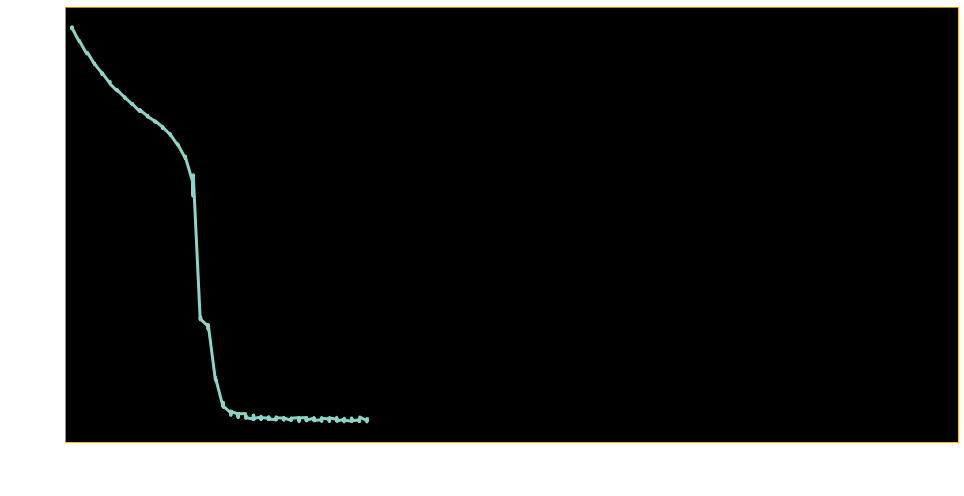

In [93]:
matplotlib.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
ax.plot(steps, losses, linewidth=3, antialiased=True)
ax.set_ylabel('Validation Loss')
ax.set_xlabel('Steps')
ax.set_xlim(0, steps[-1])
ax.spines['top'].set_edgecolor('orange')
ax.spines['left'].set_edgecolor('orange')
ax.spines['bottom'].set_edgecolor('orange')
ax.spines['right'].set_edgecolor('orange')

plt.show()

In [128]:
vlosses_dir = 'validation_losses'
if not os.path.exists(vlosses_dir):
    os.mkdir(vlosses_dir)
for i in range(len(steps)):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
    ax.plot(steps[:i], losses[:i], linewidth=3, antialiased=True)
    ax.set_ylabel('Validation Loss')
    ax.set_xlabel('Steps')
    ax.set_xlim(0, steps[-1])
    ax.set_ylim(0, 1)
    ax.spines['top'].set_edgecolor('orange')
    ax.spines['left'].set_edgecolor('orange')
    ax.spines['bottom'].set_edgecolor('orange')
    ax.spines['right'].set_edgecolor('orange') 
    plt.tight_layout()
    plt.savefig(os.path.join(vlosses_dir, str(i) +".png"))
    plt.close()


In [129]:
make_gif(vlosses_dir, "lossesBlobsFinder.gif", duration=300)

In [ ]:
filenames = []
for i in :
    # plot the line chart
    plt.plot(y[:i])
    plt.ylim(20,50)
    
    # create file name and append it to a list
    filename = f'{i}.png'
    filenames.append(filename)
    
    # save frame
    plt.savefig(filename)
    plt.close()
# build gif
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)